## Re-exploratory Analysis

As the start of our second pass through the epicycle, we wish to refine and expand our exploratory analysis. We will compute vertex and edge features on our graphs across multiple scales and multiple datasets.

#### Setup

In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
# Initializing dataset names
dnames = list(['../data/MRN114', '../data/KKI2009', '../data/SWU4'])
print "Datasets: " + ", ".join(dnames)
print "D = " + str(len(dnames))

# Getting graph names
fs = dict()
for dd in dnames:
        fs[dd] = [root+'/'+fl for root, dir, files in os.walk(dd) for fl in files if fl.endswith(".graphml")]
# fs[dnames[1]]

Datasets: ../data/MRN114, ../data/KKI2009, ../data/SWU4
D = 3


In [3]:
def loadGraphs(filenames, printer=False):
    gstruct = {}
    for idx, files in enumerate(filenames):
        if printer:
            print "Loading: " + files
        gstruct[files] = nx.read_graphml(files)
    return gstruct

In [4]:
mygs = loadGraphs(fs[fs.keys()[2]], printer=False) # only loads graphs for kki dataset

#### Number of Non-Zero (NNZ) edge weights

In [20]:
nnz = {key: len(nx.edges(mygs[key])) for key in mygs}
# nnz
# bar graph

#### Vertex Degree

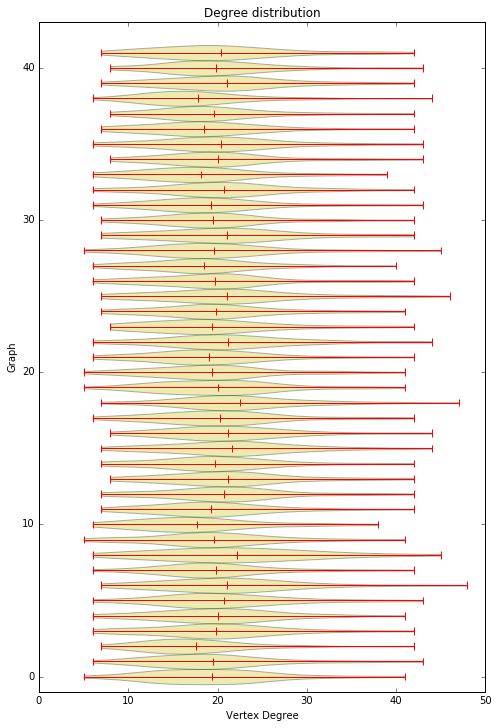

In [65]:
degrees = {key: np.array(nx.degree(mygs[key]).values()) for key in mygs}
avg_degrees = [np.mean(degrees[key]) for key in degrees]
list(degrees.values())
fig = plt.figure(figsize=(8,12))
plt.violinplot(degrees.values(), range(len(degrees)),
               vert=False, points=20, widths=1, showmeans=True, showextrema=True)
plt.title('Degree distribution')
plt.xlabel('Vertex Degree')
plt.ylabel('Graph')
plt.ylim((-1, 43))
plt.xlim((0, 50))
plt.show()

In [44]:
np.asarray(range(len(degrees)))*10

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410])

#### Edge weight

In [8]:
e_weights = {key: [mygs[key].get_edge_data(e[0],e[1])['weight']
             for e in mygs[key].edges()] for key in mygs}
avg_e_weights = [{'N': len(e_weights[key]),
                  'mean':np.mean(e_weights[key]),
                  'std':np.std(e_weights[key])} for key in e_weights]
# avg_weights

#### Edge count

In [9]:
e_count = {key: len(e_weights[key]) for key in e_weights}
# e_count

#### Number of Local 3-cliques

In [10]:
three_cliques = {key: [clique for clique in
                       nx.algorithms.clique.enumerate_all_cliques(mygs[key])
                       if len(clique) == 3] for key in mygs}
n_three_cliques = [len(three_cliques[key]) for key in three_cliques]
# n_three_cliques

#### Clustering Coefficient

In [116]:
ccoefs = {key: nx.clustering(mygs[key]).values() for key in mygs}
avg_ccoefs = [np.mean(ccoefs[key]) for key  in ccoefs]
# avg_ccoefs

#### Scan Statistic-i

In [14]:
i = 1
def scan_statistic(mygs, i):
    ss = dict()
    for key in mygs.keys():
        g = mygs[key]
        tmp = np.array(())
        for n in g.nodes():
            subgraph = nx.ego_graph(g, n, radius = i)
            tmp = np.append(tmp, np.sum([subgraph.get_edge_data(e[0],e[1])['weight'] for e in subgraph.edges()]))
        ss[key] = tmp
    return ss

ss1 = scan_statistic(mygs, i)
# ss1

In [15]:
i = 2
ss2 = scan_statistic(mygs, i)

#### Eigen value

In [16]:
laplacian = {key: nx.normalized_laplacian_matrix(mygs[key]) for key in mygs}
eigs = {key: np.linalg.eigvals(laplacian[key].A) for key in laplacian}
# eigs

#### Betweenness Centrality

In [17]:
centrality = {key: nx.algorithms.betweenness_centrality(mygs[key]).values() for key in mygs.keys()}
# centrality

#### Connected Compontent (abandonning for now)

In [164]:
ccs = {keys: nx.connected_component_subgraphs(mygs[keys]) for keys in mygs.keys()}
# nccs = {keys: len(list(ccs[keys])) for keys in ccs.keys()}
# print nccs
lccs = {keys: max(ccs[keys], key=len) for keys in ccs.keys()}